In [1]:
import pandas as pd
import json

import numpy as np
import matplotlib.pyplot as plt

# Import Data

In [2]:
import json
import pandas as pd

# Load the JSON file
file_path = './downloaded_data.json'  # Replace with your file path
with open(file_path, 'r') as file:
    data = json.load(file)

# Convert the "datetime" field to a DataFrame
df = pd.DataFrame({'datetime': data['datetime'], 'Hp60': data['Hp60']})

In [3]:
def change_time(df):
    # Remove the 'Z' and convert to Pandas datetime format
    df['datetime'] = pd.to_datetime(df['datetime'].str.replace('Z', ''))

    # Separate components
    df['date'] = df['datetime'].dt.date       # Extract date
    df['time'] = df['datetime'].dt.time       # Extract time
    df['year'] = df['datetime'].dt.year       # Extract year
    df['month'] = df['datetime'].dt.month     # Extract month
    df['day'] = df['datetime'].dt.day         # Extract day
    df['hour'] = df['datetime'].dt.hour       # Extract hour

    df = df.drop(columns=['datetime','date','time'])
    
    return df

df = change_time(df)

In [4]:
train_df = df[df['year']!=2024]
test_df = df[df['year']==2024]

In [5]:
train_df

,Hp60,year,month,day,hour
0,0.667,2021,1,1,0
1,0.000,2021,1,1,1
2,0.333,2021,1,1,2
3,0.000,2021,1,1,3
4,1.000,2021,1,1,4
...,...,...,...,...,...
26275,1.333,2023,12,31,19
26276,1.333,2023,12,31,20
26277,2.000,2023,12,31,21
26278,1.333,2023,12,31,22


## Pre process data

In [6]:
def pre_process(df):
    
    df['month_sin']= np.sin(df['month'] / 12)
    df['day_sin']= np.sin(df['day'] / 30)
    df['hour_sin']= np.sin(df['hour'] / 24)
    
    df['month_cos']= np.cos(df['month'] / 12)
    df['day_cos']= np.cos(df['day'] / 30)
    df['hour_cos']= np.cos(df['hour'] / 24)
    
    df = df.drop(columns=['year'])
    return df

In [7]:
train_df = pre_process(train_df)
test_df = pre_process(test_df)

/var/folders/9q/gllpszsd7tx204064mvtm3540000gn/T/ipykernel_26968/3903321177.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month_sin']= np.sin(df['month'] / 12)
/var/folders/9q/gllpszsd7tx204064mvtm3540000gn/T/ipykernel_26968/3903321177.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_sin']= np.sin(df['day'] / 30)
/var/folders/9q/gllpszsd7tx204064mvtm3540000gn/T/ipykernel_26968/3903321177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

# Train model RandomForestRegressor

In [8]:
from sklearn.ensemble import RandomForestRegressor

In [9]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

In [10]:
rf_regressor.fit(train_df.drop(columns=['Hp60']), train_df['Hp60'])

RandomForestRegressor(random_state=42)

## Test

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [12]:
y_pred = rf_regressor.predict(test_df.drop(columns=['Hp60']))

mae = mean_absolute_error(test_df['Hp60'], y_pred)
mse = mean_squared_error(test_df['Hp60'], y_pred) 

print('mae',mae)
print('mse',mse)

mae 1.1245123589748838
mse 2.2834994422850055


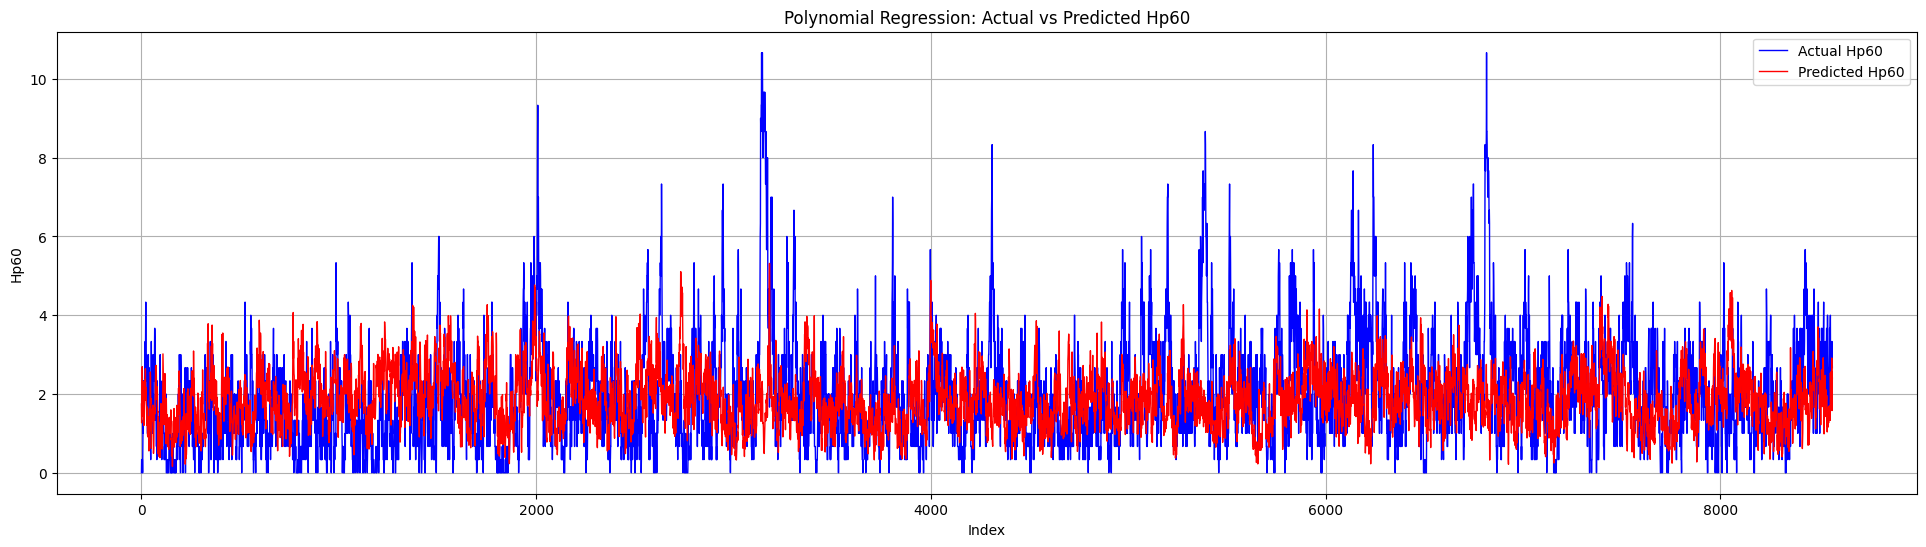

In [13]:
# Plotting y_test and y_pred on the same line graph
plt.figure(figsize=(24, 6))

# Plot the actual values (y_test)
plt.plot(test_df['Hp60'].values, label='Actual Hp60', color='blue', linewidth=1)

# Plot the predicted values (y_pred)
plt.plot(y_pred, label='Predicted Hp60', color='red', linewidth=1)

# Customize the plot
plt.title('Polynomial Regression: Actual vs Predicted Hp60')
plt.xlabel('Index')
plt.ylabel('Hp60')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

# Train model Cat

In [14]:
from catboost import CatBoostRegressor

ModuleNotFoundError: No module named 'catboost'

In [32]:
# Initialize the CatBoost Regressor
catboost_regressor = CatBoostRegressor(iterations=1000, learning_rate=0.05, depth=6, verbose=200)

In [33]:
# Train the model
catboost_regressor.fit(train_df.drop(columns=['Hp60']), train_df['Hp60'])

0:	learn: 1.2718826	total: 3.9ms	remaining: 3.9s
200:	learn: 1.2037826	total: 337ms	remaining: 1.34s
400:	learn: 1.1796541	total: 628ms	remaining: 938ms
600:	learn: 1.1646621	total: 912ms	remaining: 605ms
800:	learn: 1.1539231	total: 1.2s	remaining: 299ms
999:	learn: 1.1462238	total: 1.49s	remaining: 0us


mae 1.0452721703192824
mse 2.0073250010250874


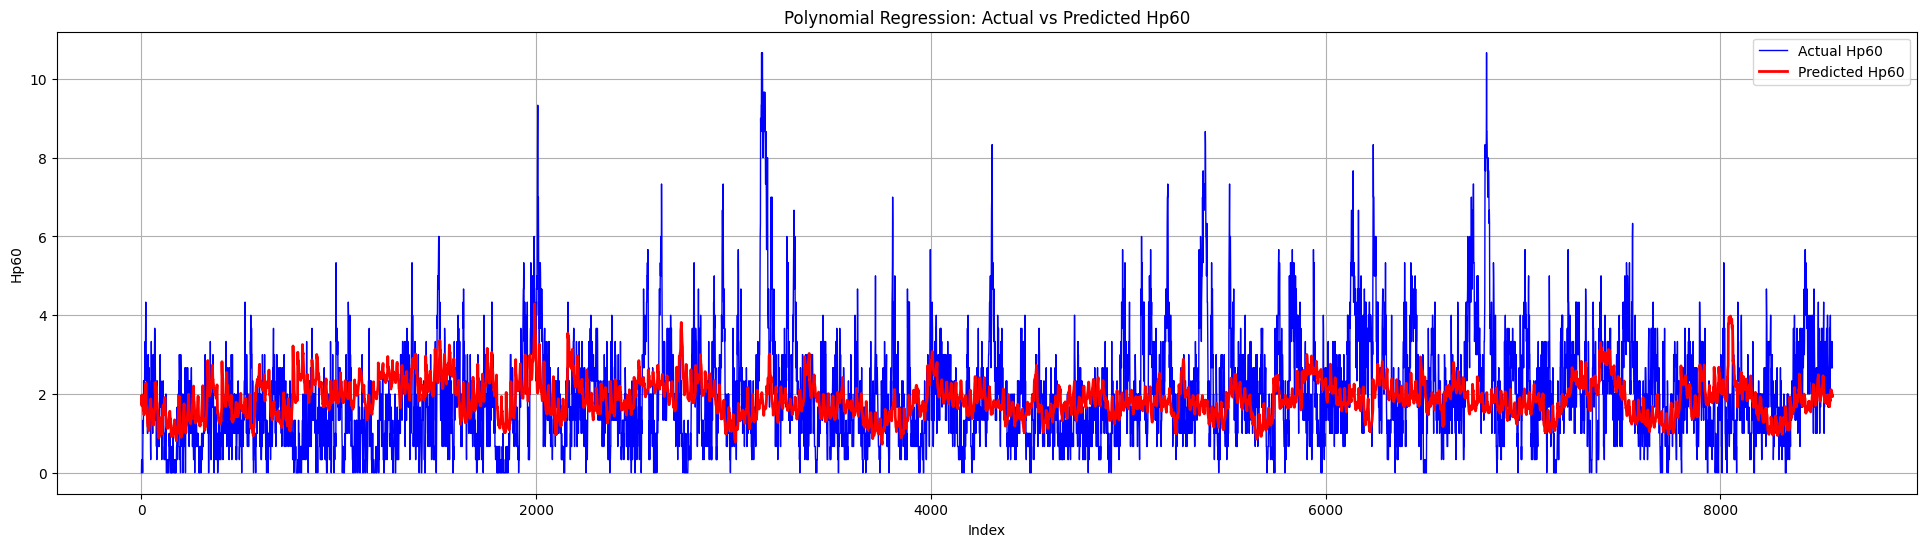

In [34]:
y_pred = catboost_regressor.predict(test_df.drop(columns=['Hp60']))

mae = mean_absolute_error(test_df['Hp60'], y_pred)
mse = mean_squared_error(test_df['Hp60'], y_pred) 

print('mae',mae)
print('mse',mse)

# Plotting y_test and y_pred on the same line graph
plt.figure(figsize=(24, 6))

# Plot the actual values (y_test)
plt.plot(test_df['Hp60'].values, label='Actual Hp60', color='blue', linewidth=1)

# Plot the predicted values (y_pred)
plt.plot(y_pred, label='Predicted Hp60', color='red', linewidth=2)

# Customize the plot
plt.title('Polynomial Regression: Actual vs Predicted Hp60')
plt.xlabel('Index')
plt.ylabel('Hp60')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()